In [1]:
import json
from pathlib import Path
from dateutil.parser import parse

import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors
import shapely

import fiona
import rasterio
import rasterio.plot
import rasterio.mask

In [2]:
# Path to simulation binary and output
PATH = Path('ESIDADarEsSalaam/ESIDADarEsSalaam_MACOSX')

# Simulation overview

In [3]:
with open(PATH / 'config.json') as f:
    d = json.load(f)

In [4]:
start_date = parse(d['globals']['startPoint'])
end_date = parse(d['globals']['endPoint'])

human_agents = None
for a in d['agents']:
    if a['name'] == 'Human':
        human_agents = a['count']

print(f"Simulation ID:       {d['id']}")
print(f"Simulation start:    {d['globals']['startPoint']}")
print(f"Simulation end:      {d['globals']['endPoint']}")
print(f"Simulation duration: {end_date - start_date}")
print("")
print(f"Human-Agent count:   {human_agents}")

Simulation ID:       ESIDADarEsSalaam
Simulation start:    2022-08-23T00:00:00
Simulation end:      2022-09-07T00:00:00
Simulation duration: 15 days, 0:00:00

Human-Agent count:   51060


# Area

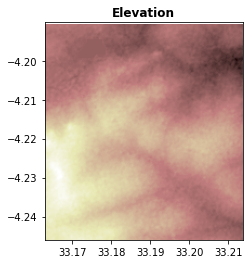

In [5]:
tiff = PATH / 'resources/rcmrd_elev/Tanzania_SRTM30meters.tif'

with rasterio.open(tiff) as src:
    nodata=src.nodata    
    band1 = src.read(1, masked=True)
    
src = rasterio.open(tiff)

fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='pink',title="Elevation")

In [6]:
# GeoHash Cells generated by simulation
mosquito_gdf = geopandas.read_file(PATH / 'mosquito_grid.geojson')

# Pois inside the simulation
pois_gdf = geopandas.read_file(PATH / 'resources/geofabrik_pois.geojson')

# Walk graph for agents
graph_gdf = geopandas.read_file(PATH / 'resources/osm_graph/edges.geojson')

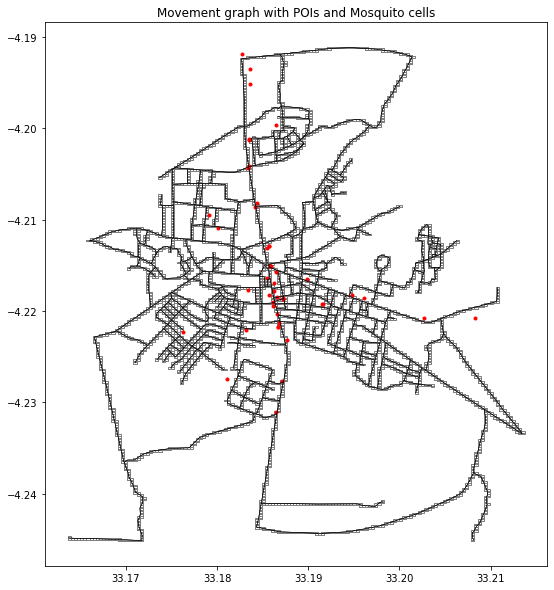

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

#rasterio.plot.show(src, extent=extent, ax=ax, alpha=1, cmap='viridis')

c = colors.to_rgba('black', 0.01)
mosquito_gdf.plot(ax=ax, color=c, edgecolor='gray', figsize=(8, 8))

graph_gdf.plot(ax=ax, color='black', lw=0.5)

pois_gdf.plot(ax=ax, marker='.', color='red')

#plt.savefig('graph_mosquito_grid.pdf', bbox_inches='tight')
#plt.savefig('graph_mosquito_grid.svg', bbox_inches='tight')

plt.title('Movement graph with POIs and Mosquito cells')
plt.show()

# Weather

In [8]:
weather_df = pd.read_csv(PATH / 'resources/visualcrossing_weather.csv', parse_dates=['datetime'])

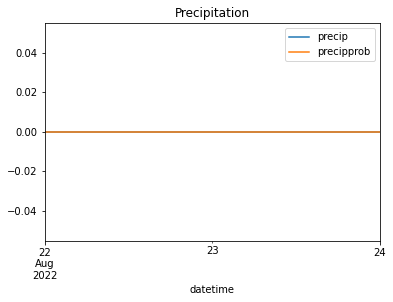

In [9]:
weather_df.plot(x='datetime', y=['precip', 'precipprob'])
plt.title('Precipitation')
plt.show()

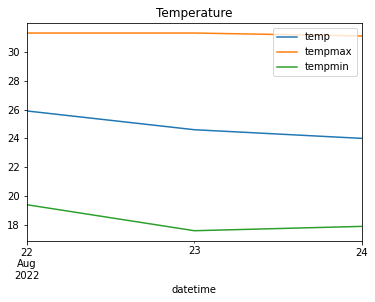

In [10]:
weather_df.plot(x='datetime', y=['temp', 'tempmax', 'tempmin'])
plt.title('Temperature')
plt.show()

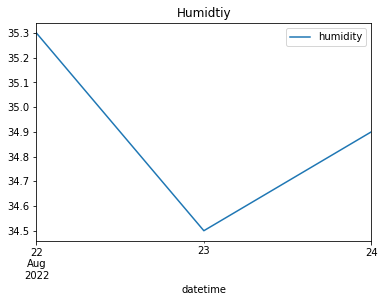

In [11]:
weather_df.plot(x='datetime', y=['humidity'])
plt.title('Humidtiy')
plt.show()

# Agents

In [12]:
human_df = pd.read_csv(PATH / 'Human.csv', parse_dates=['DateTime'])

In [13]:
len(human_df)

0